# Clase 1

En este notebook, realizaremos los ejercicios planteados [acá](https://colab.research.google.com/drive/175WnSI6Lw66rlDzBGzehTJaltnT6oGts?usp=sharing#scrollTo=XjaiegV9lvwM).

## Ejercicio 1

Aplicar los pasos del ejemplo 1 en las siguientes oraciones:

Oración 1: To be or not to be.

Oración 2: Common words like its, an, the, for, and that, are all considered stop words. While they're important for communicating verbally, stop words typically carry little importance to SEO and are often ignored by search engines.

In [1]:
import nltk
import string
import math
import numpy
import matplotlib

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
sentence1 = "To be or not to be."
sentence2 = " Common words like its, an, the, for, and that, are all considered stop words. While they're important for communicating verbally, stop words typically carry little importance to SEO and are often ignored by search engines."

sentence1_lc = [word.lower() for word in nltk.word_tokenize(sentence1)]
sentence2_lc = [word.lower() for word in nltk.word_tokenize(sentence2)]

print(sentence1_lc)
print(sentence2_lc)

stopwords = nltk.corpus.stopwords.words("english")
stemmer = nltk.stem.PorterStemmer()

['to', 'be', 'or', 'not', 'to', 'be', '.']
['common', 'words', 'like', 'its', ',', 'an', ',', 'the', ',', 'for', ',', 'and', 'that', ',', 'are', 'all', 'considered', 'stop', 'words', '.', 'while', 'they', "'re", 'important', 'for', 'communicating', 'verbally', ',', 'stop', 'words', 'typically', 'carry', 'little', 'importance', 'to', 'seo', 'and', 'are', 'often', 'ignored', 'by', 'search', 'engines', '.']


In [3]:
stems1, stems2 = [], []
for token in sentence1_lc:
    # Process each token
    if token not in string.punctuation:
        if token not in stopwords:
            token = stemmer.stem(token)
            stems1.append(token)

for token in sentence2_lc:
    # Process each token
    if token not in string.punctuation:
        if token not in stopwords:
            token = stemmer.stem(token)
            stems2.append(token)

print(stems1)
print(stems2)

[]
['common', 'word', 'like', 'consid', 'stop', 'word', "'re", 'import', 'commun', 'verbal', 'stop', 'word', 'typic', 'carri', 'littl', 'import', 'seo', 'often', 'ignor', 'search', 'engin']


In [4]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmas1, lemmas2 = [], []
for token in sentence1_lc:
    # Process each token
    if token not in string.punctuation:
        if token not in stopwords:
            lemma = lemmatizer.lemmatize(token)
            lemmas1.append(lemma)

for token in sentence2_lc:
    # Process each token
    if token not in string.punctuation:
        if token not in stopwords:
            lemma = lemmatizer.lemmatize(token)
            lemmas2.append(lemma)

print(lemmas1)
print(lemmas2)

[]
['common', 'word', 'like', 'considered', 'stop', 'word', "'re", 'important', 'communicating', 'verbally', 'stop', 'word', 'typically', 'carry', 'little', 'importance', 'seo', 'often', 'ignored', 'search', 'engine']


In [5]:
for token in nltk.word_tokenize(sentence1):
    print(token + " " + stemmer.stem(token) + " " + lemmatizer.lemmatize(token))

for token in nltk.word_tokenize(sentence2):
    print(token + " " + stemmer.stem(token) + " " + lemmatizer.lemmatize(token))

To to To
be be be
or or or
not not not
to to to
be be be
. . .
Common common Common
words word word
like like like
its it it
, , ,
an an an
, , ,
the the the
, , ,
for for for
, , ,
and and and
that that that
, , ,
are are are
all all all
considered consid considered
stop stop stop
words word word
. . .
While while While
they they they
're 're 're
important import important
for for for
communicating commun communicating
verbally verbal verbally
, , ,
stop stop stop
words word word
typically typic typically
carry carri carry
little littl little
importance import importance
to to to
SEO seo SEO
and and and
are are are
often often often
ignored ignor ignored
by by by
search search search
engines engin engine
. . .


In [8]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
doc1 = nlp(sentence1)
doc2 = nlp(sentence2)
for token in doc1:
    print(token.lemma_)
for token in doc2:
    print(token.lemma_)

to
be
or
not
to
be
.
 
common
word
like
its
,
an
,
the
,
for
,
and
that
,
be
all
consider
stop
word
.
while
they
be
important
for
communicate
verbally
,
stop
word
typically
carry
little
importance
to
seo
and
be
often
ignore
by
search
engine
.


## Ejercicio 2

- Repita los pasos del ejemplo 3 sin aplicar stemming e identifique cuál es la palabra clave más representativa (según tfidf) en cada uno de los discursos.
- Determinar cuál es el par de discursos más similares entre sí y cuál es el par de discursos menos similares entre sí.
- Dado un texto ingresado por el usario y un umbral de similitud t, devolver una lista con los identificadores de archivos de aquellos discursos cuya similitud al texto sea mayor a t. La lista debe estar ordenada de mayor a menor grado de similitud al texto ingresado.
- Tomar el [discurso](https://docs.google.com/document/d/1sudCirmOnKlstJa0bB_d3s3b5UEIxVtcGENuzvlnCvo/edit) inagural del presidente Javier Milei traducido al inglés y repetir el ejercicio 3.

Generamos una matriz TF-IDF a partir del corpus "Inaugural" provisto por nltk.

Identificamos el conjunto de términos (palabras clave) del corpus y transformamos a cada documento en una lista de términos.

In [9]:
corpus = []
term_set = set ()
filenames = []
filename_to_id ={}

id = 0
for filename in nltk.corpus.inaugural.fileids():
  filenames.append(filename)
  filename_to_id[filename] = id
  raw_document = nltk.corpus.inaugural.raw(filename)
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    # Process each token
    if token not in string.punctuation:
      if token not in stopwords:
        terms.append(token)
        term_set.add(token)
  corpus.append(terms)
  id += 1
num_documents = len(corpus)
num_terms = len(term_set)

Creamos un mapeo de términos a números (ids).

In [10]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1


Creamos una matriz TF.

In [11]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1

Creamos un vector IDF.

In [12]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)
print(idf_vector)

[1.77085201 1.46982202 1.46982202 ... 0.65690866 1.16879202 1.46982202]


Creamos la matriz TF-IDF.

In [13]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

Ahora vamos a extraer la palabra más significativa para cada uno de los discursos (documentos), según la tabla que acabamos de crear.

In [14]:
significant_words = []
doc_id = 0
most_sig_term  = ""
most_sig_val = 0

print("document_name --> most_sig_word = most_sig_score")

for document in tfidf_matrix:
    for term in term_set:
        term_significance = document[term_to_id[term]]
        if term_significance > most_sig_val:
            most_sig_val = term_significance
            most_sig_term = term
    print(filenames[doc_id], "-->", most_sig_term, "=", most_sig_val)
    significant_words.append(most_sig_term)
    doc_id += 1
    most_sig_term  = ""
    most_sig_val = 0

document_name --> most_sig_word = most_sig_score
1789-Washington.txt --> immutable = 2.939644031956326
1793-Washington.txt --> upbraidings = 1.7708520116421442
1797-Adams.txt --> pleasing = 5.879288063912652
1801-Jefferson.txt --> thousandth = 3.5417040232842885
1805-Jefferson.txt --> whatsoever = 4.4094660479344885
1809-Madison.txt --> improvements = 3.215646021918376
1813-Madison.txt --> british = 5.359410036530626
1817-Monroe.txt --> trials = 4.4094660479344885
1821-Monroe.txt --> spain = 5.879288063912652
1825-Adams.txt --> union = 5.314040666444764
1829-Jackson.txt --> diffidence = 2.5874615138449633
1833-Jackson.txt --> inculcate = 2.939644031956326
1837-VanBuren.txt --> institutions = 5.431811959730509
1841-Harrison.txt --> roman = 12.39596408149501
1845-Polk.txt --> texas = 14.69822015978163
1849-Taylor.txt --> vested = 2.1437640146122505
1853-Pierce.txt --> hardly = 5.1749230276899265
1857-Buchanan.txt --> whilst = 5.554523829767324
1861-Lincoln.txt --> clause = 7.349110079890

Lo siguiente que haremos, será determinar el par de discursos más similares entre sí, y el par de discursos más disimilares.

Normalizamos la matrtiz TF-IDF.

In [15]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

Determinamos los pares

In [16]:
similarity_matrix = numpy.zeros((num_documents, num_documents))

most_similar_ids = [0,0]
most_similarity = -math.inf
most_disimilar_ids = [0,0]
least_similarity = math.inf

doc1_id, doc2_id = 0,0

for doc1 in normalized_tfidf_matrix:
    for doc2 in normalized_tfidf_matrix:    
        similarity = numpy.dot(doc1, doc2)
        similarity_matrix[doc1_id][doc2_id] = similarity
        if doc1_id != doc2_id:
            # greatest similarity?
            if similarity > most_similarity:
                most_similarity = similarity
                most_similar_ids = [doc1_id, doc2_id]

            # greatest disimilarity?
            if similarity < least_similarity:
                least_similarity = similarity
                least_similar_ids = [doc1_id, doc2_id]

        doc2_id += 1
    doc2_id = 0
    doc1_id += 1

print("Most similar docs:", filenames[most_disimilar_ids[0]], filenames[most_similar_ids[1]])
print("Similarity: ", most_similarity)
print("Least similar docs:", filenames[least_similar_ids[0]], filenames[least_similar_ids[1]])
print("Similarity: ", least_similarity)


Most similar docs: 1789-Washington.txt 1821-Monroe.txt
Similarity:  0.272914006820192
Least similar docs: 1793-Washington.txt 1905-Roosevelt.txt
Similarity:  0.0036647596828497993


Vamos a visualizar las similitudes para tener una mejor idea de la distribución de valores

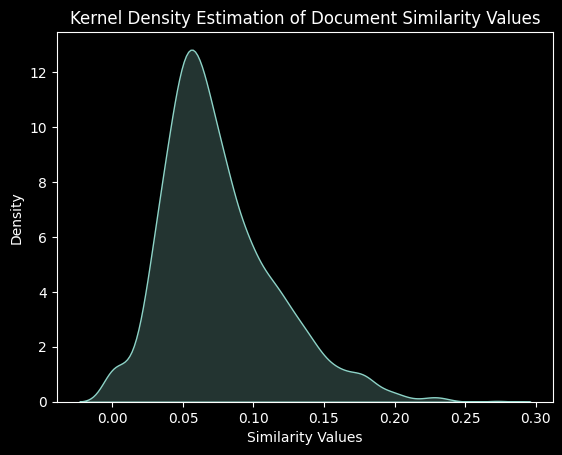

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

# We remove diagonal elements so we don't take into account perfect similarity values 
mask = numpy.eye(similarity_matrix.shape[0], dtype=bool)
similarity_matrix[mask] = 0
similarity_values = similarity_matrix.flatten()

sns.kdeplot(similarity_values, fill=True)
plt.xlabel('Similarity Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Document Similarity Values')
plt.show()

In [ ]:
from matplotlib.pyplot import figure

target_document =  normalized_tfidf_matrix[filename_to_id['2021-Biden.txt']]
similarities = numpy.zeros(num_documents)
document_id = 0
for document in normalized_tfidf_matrix:
  similarities[document_id] = numpy.dot(document,target_document)
  document_id += 1

figure(num=None, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
y_pos = numpy.arange(len(filenames))
matplotlib.pyplot.barh(y_pos,similarities,tick_label=filenames)

Consultas para continuar

- Hay que agregar el documento al nuevo al corpus para calcular los valores?
- Es relevante?
- Es relevante cuando solo se agrega un vector?
- Si es irrelevante, como se puede asegurar? Tiene que ver con los vectores diferencia entre los preexistentes y el añadido.

- Como usar el indice invertido para queries? 